## Logistic Regression with TensorFlow

In [105]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [106]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [107]:
iris_X, iris_y = iris.data[:-1, :], iris.target[:-1]

In [108]:
iris_X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [109]:
iris_y[0:5]

array([0, 0, 0, 0, 0])

In [110]:
iris_y = pd.get_dummies(iris_y).values

In [111]:
iris_y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [113]:
# Define x and y. These variables will hold our iris data (both the features and label matrices).
# Need to give them shapes which correspond to the shape of our data
numFeatures = X_train.shape[1]
print(f'numFeatures is: {numFeatures}')

# numLabels is the number of our classes our data points can be in
# In the iris dataset, this is number '3'
numLabels = y_train.shape[1]
print(f'numLabels is: {numLabels}')

numFeatures is: 4
numLabels is: 3


In [114]:
X_train = tf.constant(X_train, dtype='float32')
y_train = tf.constant(y_train, dtype='float32')
X_test = tf.constant(X_test, dtype='float32')
y_test = tf.constant(y_test, dtype='float32')

## Set model weights and bias

In [115]:
W = tf.Variable(tf.zeros([4, 3])) # 4-dimensional input and 3 classes
b = tf.Variable(tf.zeros([3]))  # 3-dimensional output [0,0,1], [0,1,0], [1,0,0]

In [116]:
# Randomly sample from a normal distribution with standard deviation .01
weights = tf.Variable(tf.random.normal([numFeatures, numLabels], 
                                       mean=0., stddev=0.01, name='weights')
                                       , dtype='float32')
bias = tf.Variable(tf.random.normal([1, numLabels], 
                                    mean=0., stddev=0.01, name='bias'))

## Logistic Regression model
$$
ŷ =sigmoid(WX+b)
$$

-   a weight times features matrix multiplication operation, 
-   a summation of the weighted features and a bias term, 
-   and finally the application of a sigmoid function. 

In [117]:
# Three-component breakdown of the Logistic Regression equation
def logistic_regression(x):
  apply_weights_OP = tf.matmul(x, weights, name='apply_weights')
  add_bias_OP = tf.add(apply_weights_OP, bias, name='add_bias')
  activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
  return activation_OP

## Training

In [118]:
# Number of Epochs in our training
numEpochs = 800

# Defining our learning rate iterations (decay)
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                                              decay_steps=X_train.shape[0],
                                                              decay_rate=0.95,
                                                              staircase=True)

In [119]:
# Defining our cost function - Squared Mean Error
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)

In [120]:
# Accuracy metric
def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [121]:
# Optimization process

def run_optimization(x, y):
  with tf.GradientTape() as g:
    pred = logistic_regression(x)
    loss = loss_object(pred, y)
  gradients = g.gradient(loss, [weights, bias])
  optimizer.apply_gradients(zip(gradients, [weights, bias]))

In [122]:
# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1

# training epochs
for i in range(numEpochs):
  if i > 1 and diff < 0.0001:
    print("change in loss %g; convergence. "%diff)
    break
  else:
    # run training step
    run_optimization(X_train, y_train)

    #report occasional stats
    if i % display_step == 0:
      # add epoch to epoch values
      epoch_values.append(i)

      pred = logistic_regression(X_test)

      newLoss = loss_object(pred, y_test)
      # add loss to live graphing variable
      loss_values.append(newLoss)

      # generate accuracy stats on test data
      acc = accuracy(pred, y_test)
      accuracy_values.append(acc)

      # re-assign values for variables
      diff = accuracy(pred, y_test)
      loss = newLoss

      # generate print statements
      print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

# how well do we perform on held-out test data?
print("Final accuracy on test set: %s" %acc.numpy())

step 0, training accuracy 0.38, loss 0.137133, change in loss 0.38
step 10, training accuracy 0.38, loss 0.136551, change in loss 0.38
step 20, training accuracy 0.38, loss 0.135977, change in loss 0.38
step 30, training accuracy 0.38, loss 0.135411, change in loss 0.38
step 40, training accuracy 0.38, loss 0.134853, change in loss 0.38
step 50, training accuracy 0.38, loss 0.134303, change in loss 0.38
step 60, training accuracy 0.28, loss 0.133761, change in loss 0.28
step 70, training accuracy 0.12, loss 0.133227, change in loss 0.12
step 80, training accuracy 0.28, loss 0.1327, change in loss 0.28
step 90, training accuracy 0.32, loss 0.132182, change in loss 0.32
step 100, training accuracy 0.32, loss 0.131676, change in loss 0.32
step 110, training accuracy 0.32, loss 0.131199, change in loss 0.32
step 120, training accuracy 0.32, loss 0.130728, change in loss 0.32
step 130, training accuracy 0.32, loss 0.130264, change in loss 0.32
step 140, training accuracy 0.32, loss 0.129807

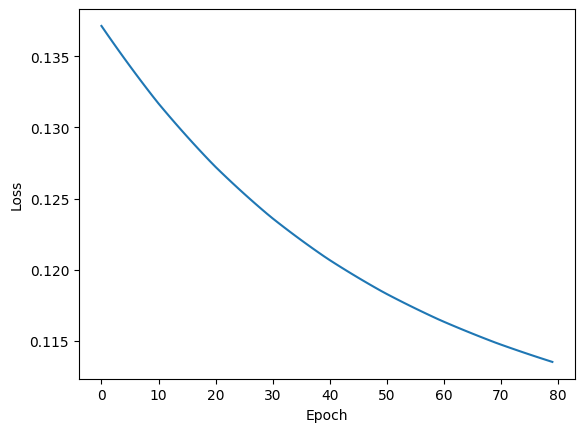

In [124]:
#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()